## Evaluation Task 1 for **Machine Learning Model for the Albedo of Mercury**

### Problem Statement 1 :

### Predicting the Lunar Albedo based on Chemical Composition





### Importing important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import urllib.request
import pandas as pd
from numpy import genfromtxt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Importing Dataset

Getting the data from https://github.com/ML4SCI/ML4SCI_GSoC/tree/main/Messenger/Moon and converting it into proper format for further processing.

In [2]:
data_all = {}


Albedo = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/Albedo_Map.csv')
lines = [i.decode('utf-8') for i in Albedo.readlines()]
data_all['Albedo'] = genfromtxt(lines, delimiter=',')

LPFe = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPFe_Map.csv')
lines = [i.decode('utf-8') for i in LPFe.readlines()]
data_all['Fe'] = genfromtxt(lines, delimiter=',')

LPK = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPK_Map.csv')
lines = [i.decode('utf-8') for i in LPK.readlines()]
data_all['K'] = genfromtxt(lines, delimiter=',')

LPTh = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPTh_Map.csv')
lines = [i.decode('utf-8') for i in LPTh.readlines()]
data_all['Th'] = genfromtxt(lines, delimiter=',')

LPTi = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/LPTi_Map.csv')
lines = [i.decode('utf-8') for i in LPTi.readlines()]
data_all['Ti'] = genfromtxt(lines, delimiter=',')


### Data Visualization

The albedo and chemical composition maps are visualized and present in two forms for better understanding of the data. Furthermore, data correlation matrix is visualized.

<Figure size 432x288 with 0 Axes>

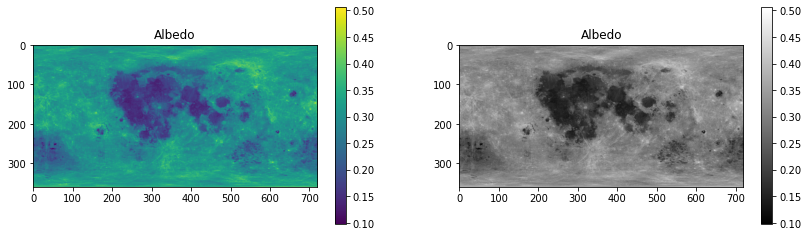

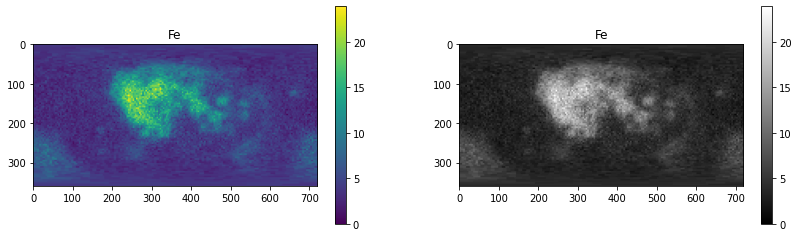

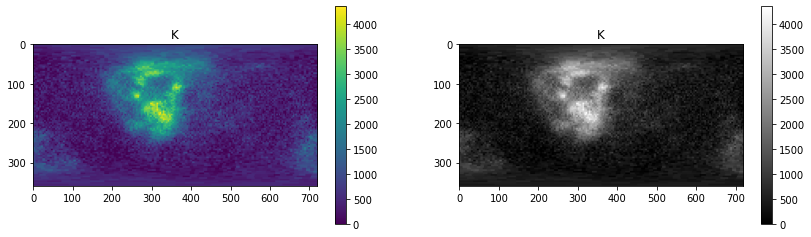

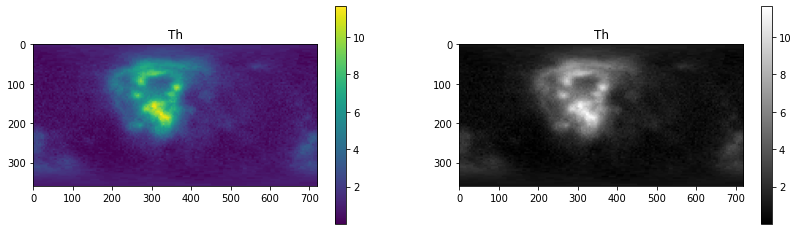

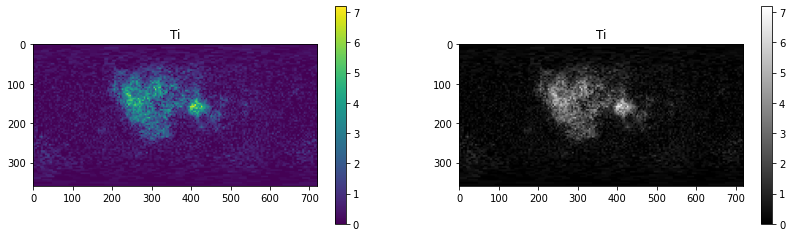

In [3]:
for i, (key, value) in enumerate(data_all.items()):
    plt.figure(i)
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    axes[0].set_title(f"{key}")
    original = axes[0].imshow(value)
    plt.colorbar(original, ax=axes[0])
    axes[1].set_title(f"{key}")
    gray_image = axes[1].imshow(value, cmap='gray')
    plt.colorbar(gray_image, ax=axes[1])    

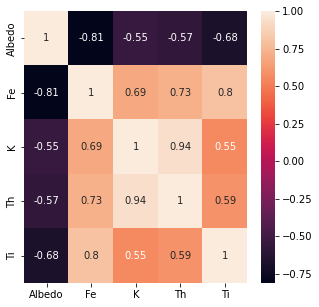

In [4]:
elem = np.array(list(zip(data_all['Albedo'].flatten(), data_all['Fe'].flatten(), data_all['K'].flatten(), data_all['Th'].flatten(), data_all['Ti'].flatten())))
df = pd.DataFrame(elem,columns=['Albedo','Fe','K','Th','Ti'])
corr = df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True)

### Spliting Dataset into Test and Train sets

Divided the image data into two halves. One is used for training and the other is used for testing.

In [5]:
n = len(elem)//2
train = elem[:n]
test = elem[n:]
x_train, y_train = train[:,1:], train[:,0]
x_test, y_test  = test[:,1:], test[:,0]

### Training ML model and calculation of the MSE and accuracy.

I decided to use the Gradient Boosting Regression for this task. The mean squared error is found out to be 0.0011214968592698487. 

In [7]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42, loss='ls').fit(x_train, y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
print("MSE for this model is", mse)
print("Model Accuracy for Test set: %.3f" % model.score(x_test, y_test))
print("Model Accuracy for Train set: %.3f" % model.score(x_train, y_train))

MSE for this model is 0.0011214968592698487
Model Accuracy for Test set: 0.464
Model Accuracy for Train set: 0.819


### Results:
The orginal and predicted maps are compared and residuals (difference
from the true image) is presented as a 2D image and a 1D histogram

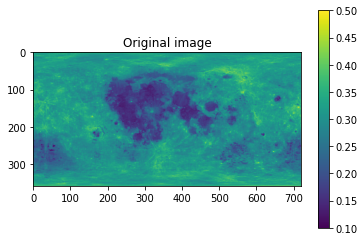

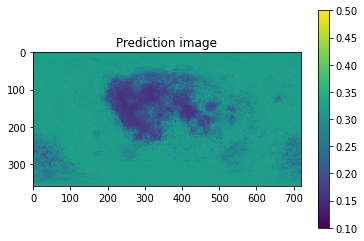

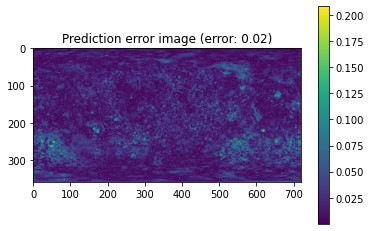

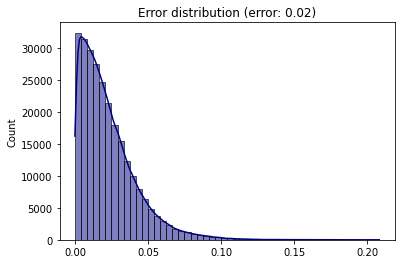

In [8]:
original = data_all['Albedo']
plt.figure(0)
plt.title("Original image")
plt.imshow(original, vmin=0.10, vmax=0.5)
plt.colorbar()
prediction = np.concatenate([model.predict(x_train), model.predict(x_test)])
pred_img = prediction.reshape(360,720)
plt.figure(1)
plt.title("Prediction image")
plt.imshow(pred_img, vmin=0.10, vmax=0.5)
plt.colorbar()
error_img = np.abs(pred_img-original)
avg_error = np.average(error_img.flatten())
plt.figure(2)
plt.title(f"Prediction error image (error: {avg_error:.2f})")
plt.imshow(error_img)
plt.colorbar()
plt.figure(3)
plt.title(f"Error distribution (error: {avg_error:.2f})")
sns.histplot(data = error_img.flatten(), bins=50, color = 'navy',kde = True)